<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Dataset Description</title>
    <style>
        body {
            font-family: Arial, sans-serif;
        }
        h1 {
            color: red;
        }
        h2 {
            color: blue;
        }
        .feature-list {
            margin-left: 20px;
        }
        .feature-list li {
            color: #34495e;
        }
        .target-variable {
            color: #c0392b;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <h1>About Dataset</h 
1>
<h3> <p style="color: blue;">This is the HR datasets. In our dataset 50000 rows and 14 columns. Every year, around 5% of its employees have promoted in the company. so, we have the check employee is promoted or not?
</p></h3>s and their promotion status.</p>
    <h2>Features:</h2>
    <ul class="feature-list">
        <li>Employee ID: Unique identifier for each employee</li>
        <li>Department: Department in which the employee works</li>
        <li>Region: Employee's region</li>
        <li>Education: Employee's education level</li>
        <li>Gender: Employee's gender</li>
        <li>Recruitment Channel: Channel through which the employee was recruited</li>
        <li>Number of Trainings: Number of trainings the employee has attended</li>
        <li>Age: Employee's age</li>
        <li>Previous Year Rating: Employee's rating in the previous year</li>
        <li>Length of Service: Number of years the employee has worked in the company</li>
        <li>KPIs met >80%: Whether the employee met more than 80% of Key Performance Indicators</li>
        <li>Awards Won?: Whether the employee has won any awards</li>
        <li>Average Training Score: Average score of the trainings attended by the employee</li>
        <li class="target-variable">Is Promoted (Target Variable): Whether the employee is promoted (0: No, 1: Yes)</li>
    </ul>
</body>
</html>
(0: No, 1: Yes)</li>
    </ul>
</body>
</html>
 (0: No, 1: Yes)</li>
    </ul>
</body>
</html>

In [55]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot  as plt 
import seaborn as sns 
import scipy as py 
import sweetviz as sv


import tensorflow as tf  
from tensorflow import keras 
from keras import Sequential  
from keras.layers import Dense


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from tensorflow.keras.callbacks import EarlyStopping
from mlxtend.plotting import plot_decision_regions


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
Employee_promotion = pd.read_csv('train.csv')
Employee_promotion.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
47030,53552,Sales & Marketing,region_7,Bachelor's,m,other,1,45,5.0,9,1,0,52,0
33760,46075,Analytics,region_31,Bachelor's,m,other,2,31,5.0,5,1,0,83,0
14189,44188,Legal,region_27,Bachelor's,m,sourcing,1,27,3.0,2,0,0,58,0
884,47808,Sales & Marketing,region_4,Bachelor's,m,other,1,38,4.0,6,0,0,46,0
33419,42036,HR,region_2,Bachelor's,m,other,1,32,4.0,9,0,0,47,0


In [3]:
# Generate the report
report = sv.analyze(Employee_promotion)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
print(Employee_promotion.shape )

(54808, 14)


In [5]:
print(Employee_promotion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
None


In [6]:
no_values = Employee_promotion.isnull().sum()
print(f"here we printing the no values {no_values}")

here we printing the no values employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


In [7]:
no_values = Employee_promotion.isnull().sum()
total_values = len(Employee_promotion)
percentage_null = (no_values / total_values) * 100
print("Percentage of null values:")
print(percentage_null)

Percentage of null values:
employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64


In [8]:
duplicated = Employee_promotion.duplicated().sum()
print(f"The total duplicted value  : {duplicated}")

The total duplicted value  : 0


In [9]:
Employee_promotion.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
Employee_promotion.describe().corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,0.255369,0.255897,0.255322,0.25572,0.255274,0.255269,0.256313,0.255268
no_of_trainings,0.255369,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000
age,0.255897,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
previous_year_rating,0.255322,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000
length_of_service,0.255720,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
KPIs_met >80%,0.255274,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000
awards_won?,0.255269,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000
avg_training_score,0.256313,0.999999,1.000000,0.999999,1.00000,0.999999,0.999999,1.000000,0.999999
is_promoted,0.255268,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000


In [11]:
Employee_promotion.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


 # EDA 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14084\1952618449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")


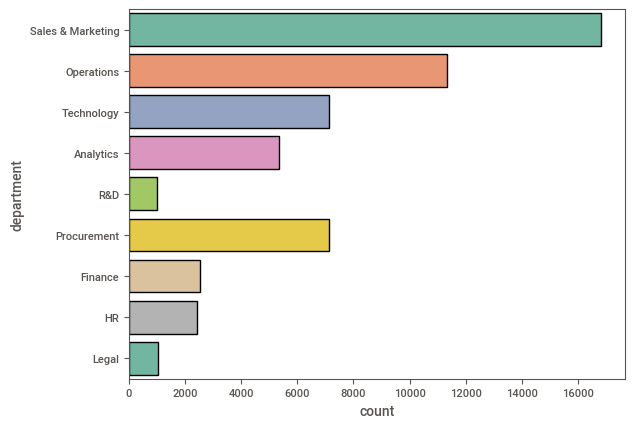

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14084\1952618449.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")


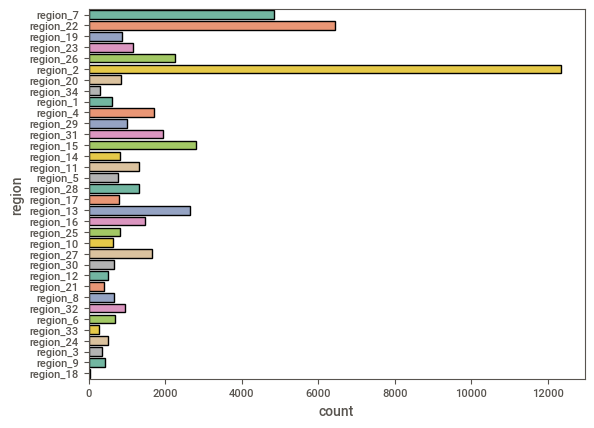

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14084\1952618449.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")


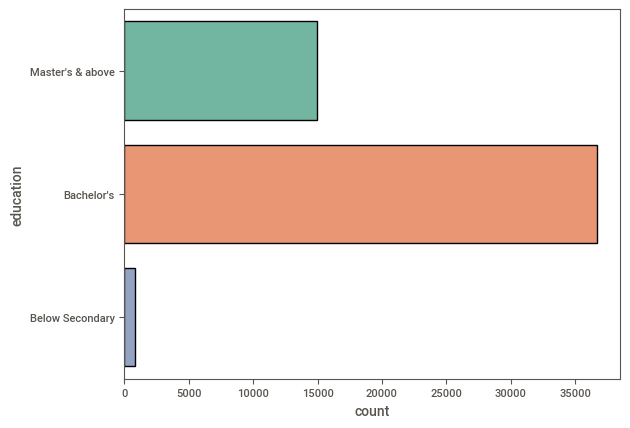

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14084\1952618449.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")


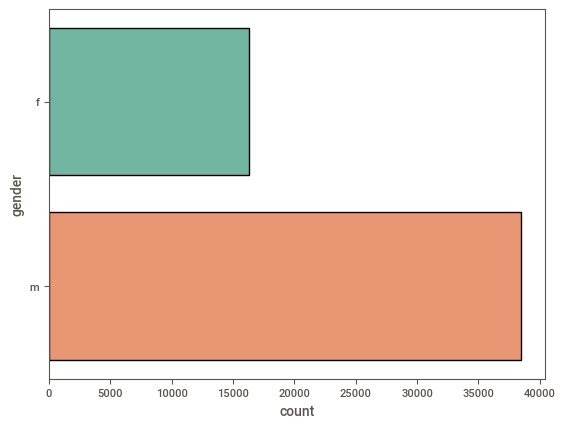

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14084\1952618449.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")


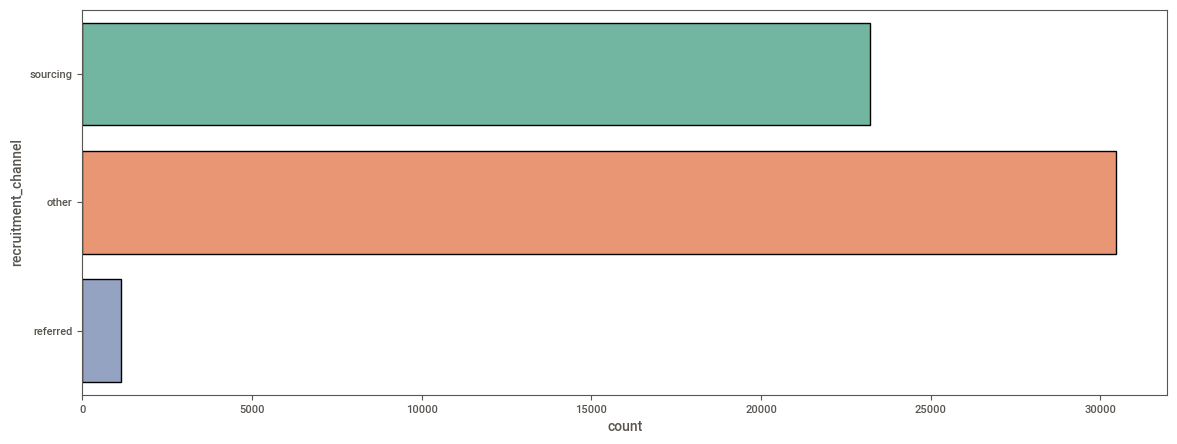

In [12]:
# here in theis we count the data in the given below with this ploting 
for columns in Employee_promotion.columns:
    if columns == 'department':
      # plt.figure(figsize=(14,5))
      sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")
      # plt.grid()
      plt.show()
    if columns == 'region':
      # plt.figure(figsize=(14,5))
      sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")
      # plt.grid()
      plt.show()
    if columns == 'education':
      # plt.figure(figsize=(14,5))
      sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")
      # plt.grid()
      plt.show()
    if columns == 'gender':
      # plt.figure(figsize=(14,5))
      sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")
      # plt.grid()
      plt.show()
    if columns == 'recruitment_channel':
      plt.figure(figsize=(14,5))
      sns.countplot(Employee_promotion[columns],palette='Set2',edgecolor="black")
      # plt.grid()
      plt.show()

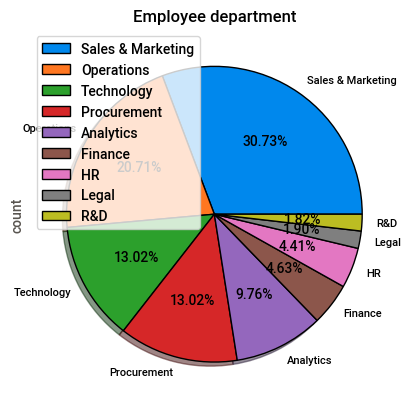

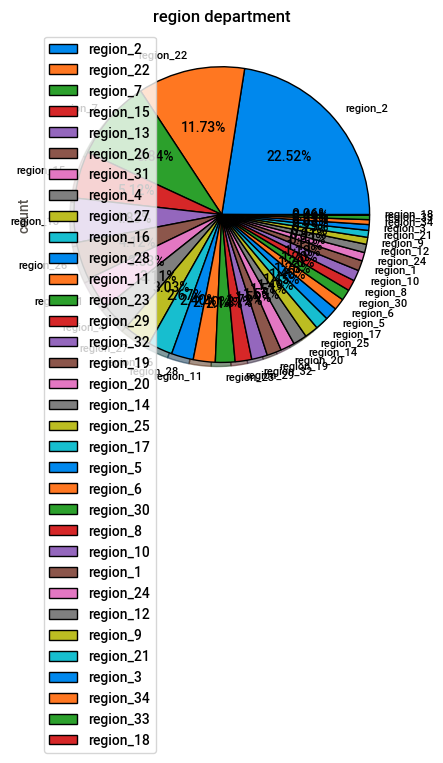

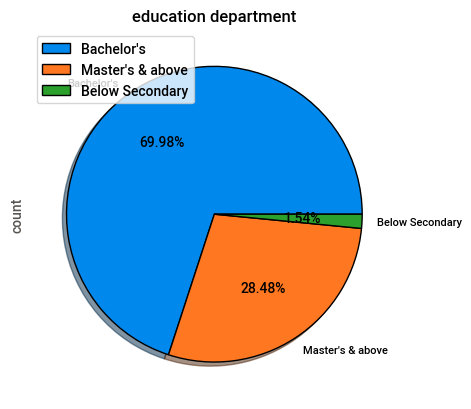

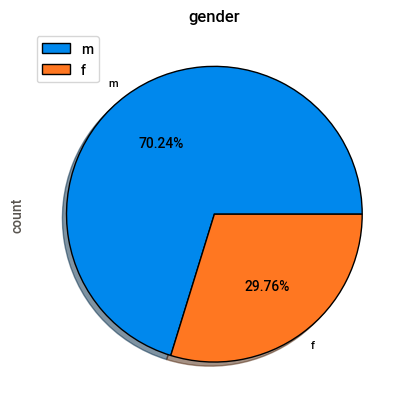

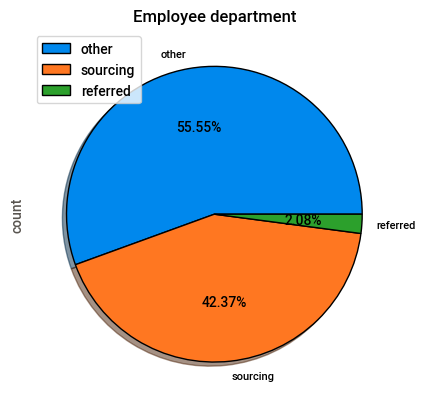

In [18]:

for columns in Employee_promotion.columns:
    if columns == 'department':
        # ex = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6]
        Employee_promotion[columns].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
        plt.title('Employee department')
        plt.legend(loc='upper left')
        plt.show()
        # ex = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6]
    elif columns =='region':
        Employee_promotion[columns].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
        plt.title('region department')
        plt.legend(loc='upper left')
        plt.show()
        # ex = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6]
    elif columns =='education':
        Employee_promotion[columns].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
        plt.title('education department')
        plt.legend(loc='upper left')
        plt.show()
        # ex = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6]
    elif columns =='gender':
        Employee_promotion[columns].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
        plt.title('gender')
        plt.legend(loc='upper left')
        plt.show()
    
    elif columns =='recruitment_channel':
        Employee_promotion[columns].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
        plt.title('Employee department')
        plt.legend(loc='upper left')
        plt.show()

In [20]:
Employee_promotion.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


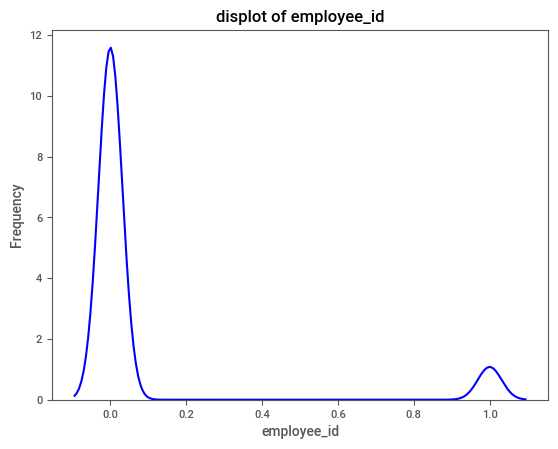

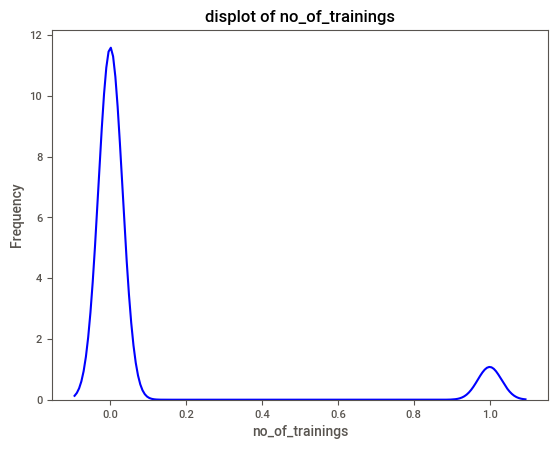

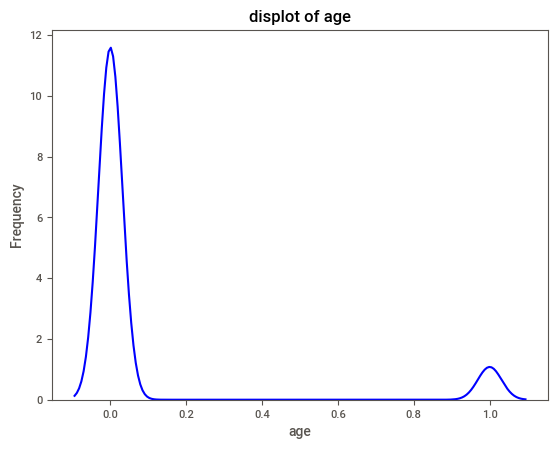

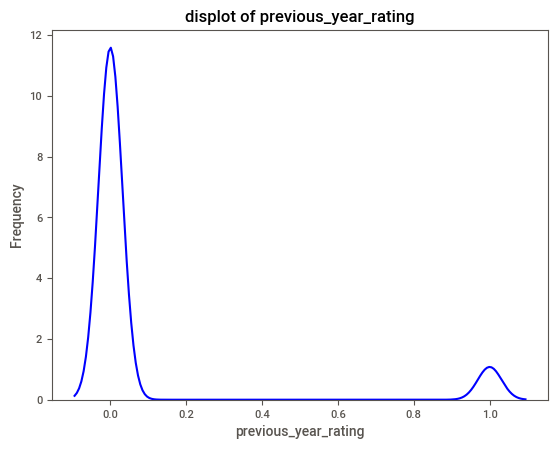

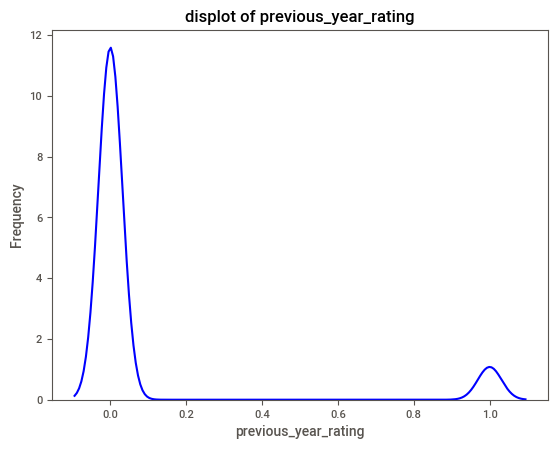

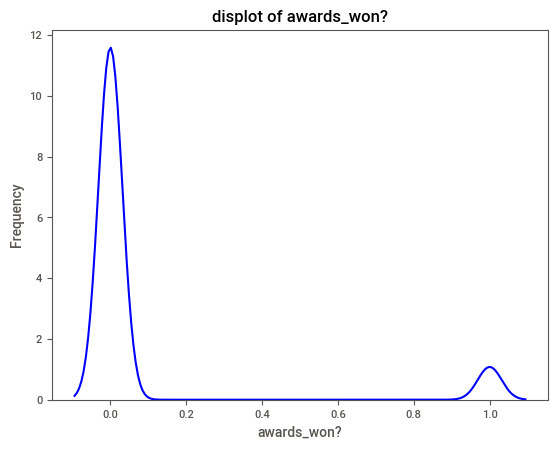

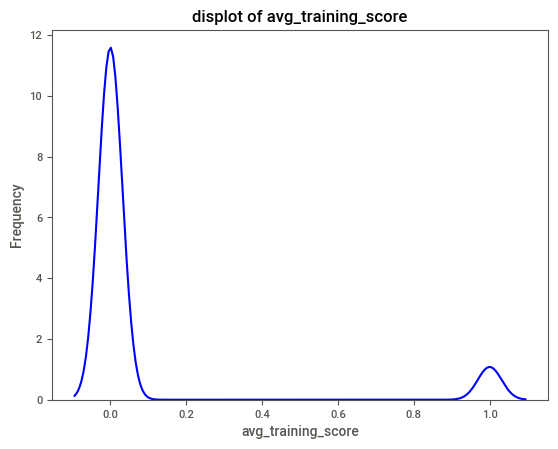

In [21]:
for column in Employee_promotion.columns:
    
    if column == 'employee_id':
      plt.figure()
      sns.kdeplot(Employee_promotion[columns], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()  
    if column == 'no_of_trainings':
      plt.figure()
      sns.kdeplot(Employee_promotion[columns], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()  
    if column == 'previous_year_rating':
      plt.figure()
      sns.kdeplot(Employee_promotion[columns], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()  
    if column == 'age':
      plt.figure()
      sns.kdeplot(Employee_promotion[columns], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()  
    if column == 'length_of_service	':
      plt.figure()
      sns.kdeplot(Employee_promotion[columns], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()  
    if column == 'KPIs_met >80%	':
      plt.figure()
      sns.kdeplot(Employee_promotion[columns], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()  
    if column == 'previous_year_rating':
      plt.figure()
      sns.kdeplot(Employee_promotion[columns], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()  
 
    if column == 'avg_training_score':
      plt.figure()
      sns.kdeplot(Employee_promotion[columns], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()  
 
    if column == 'awards_won?':
      plt.figure()
      sns.kdeplot(Employee_promotion[columns], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()  
 

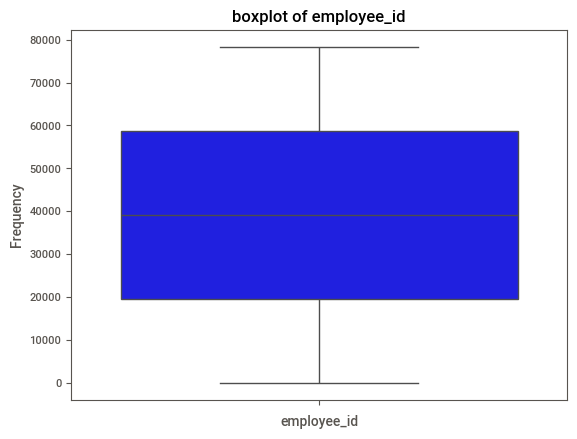

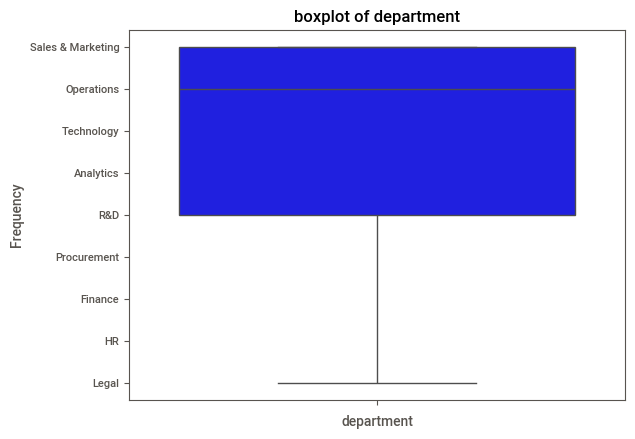

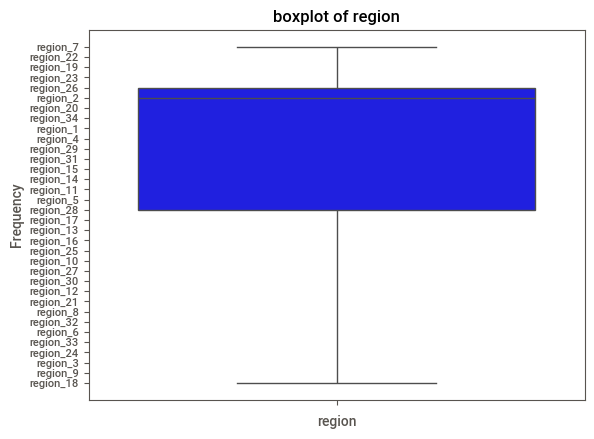

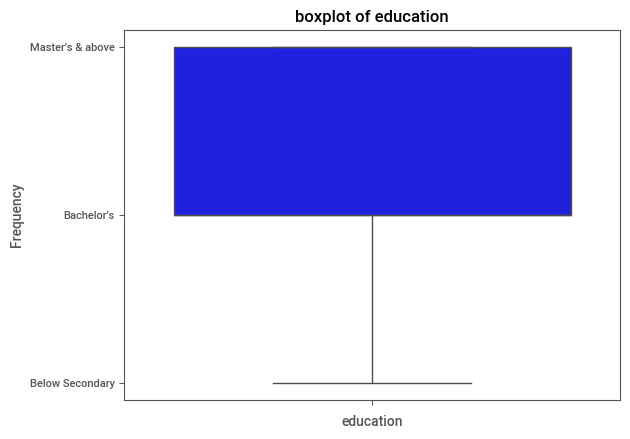

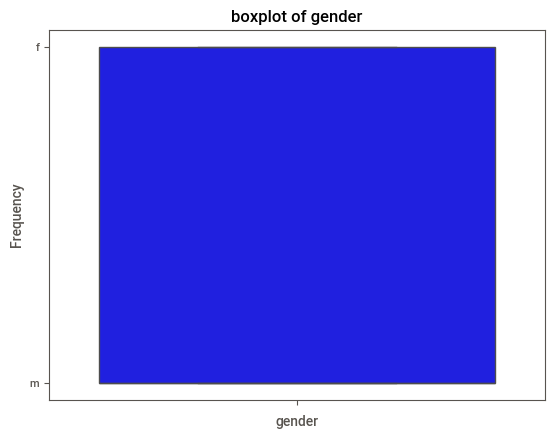

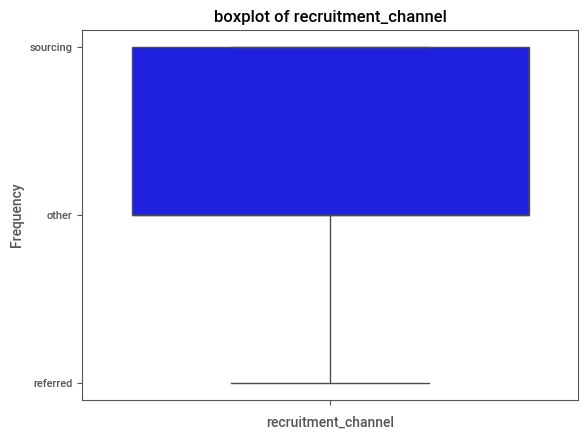

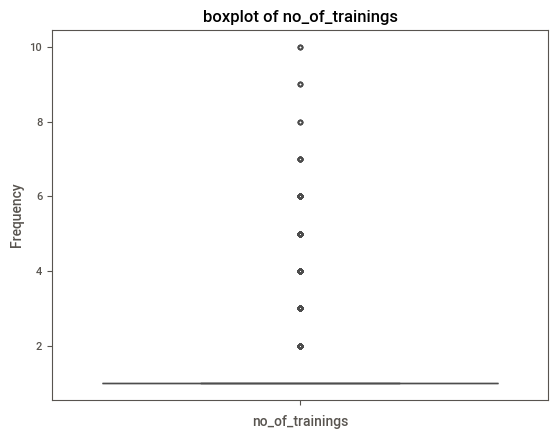

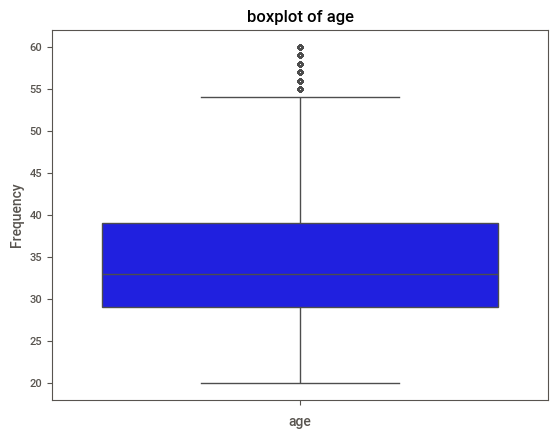

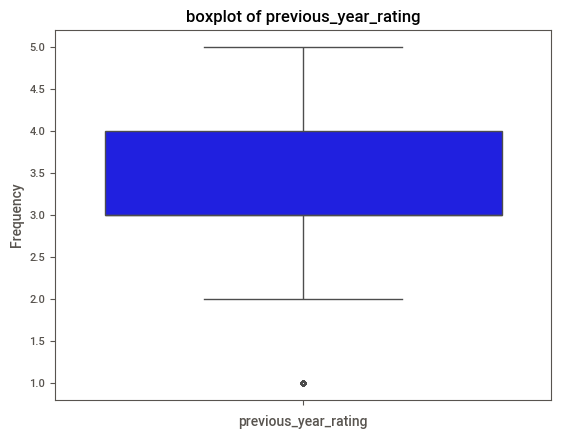

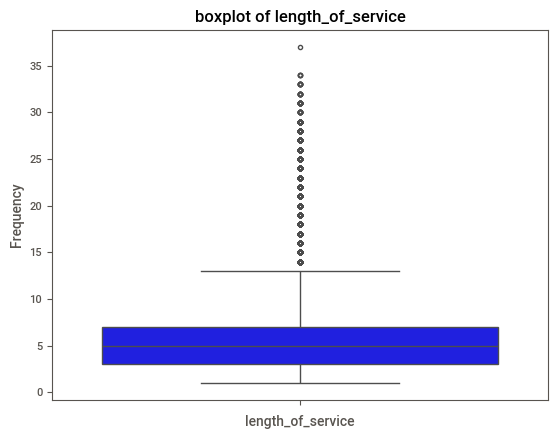

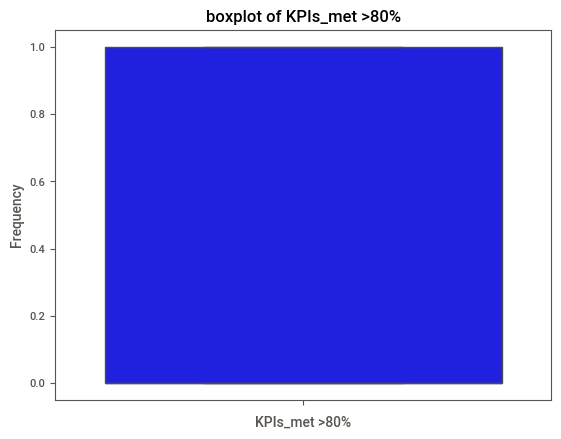

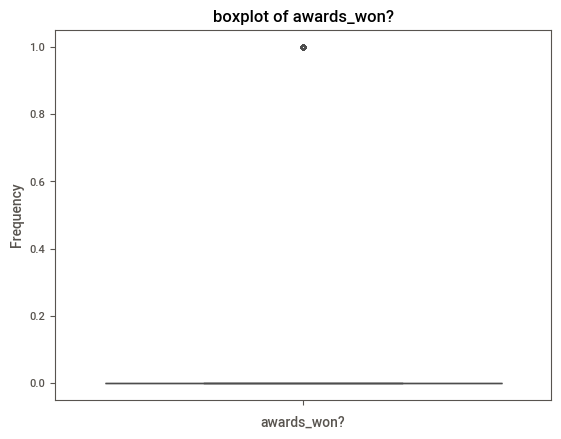

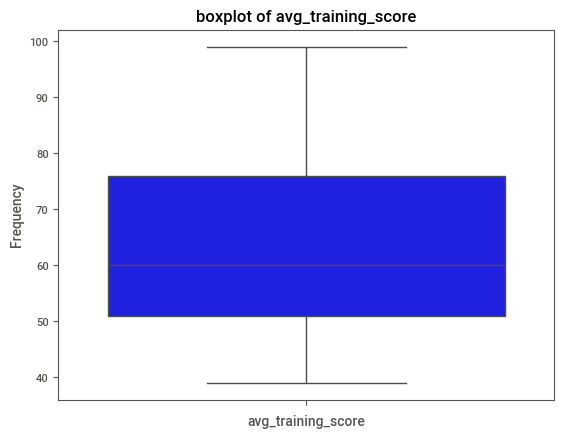

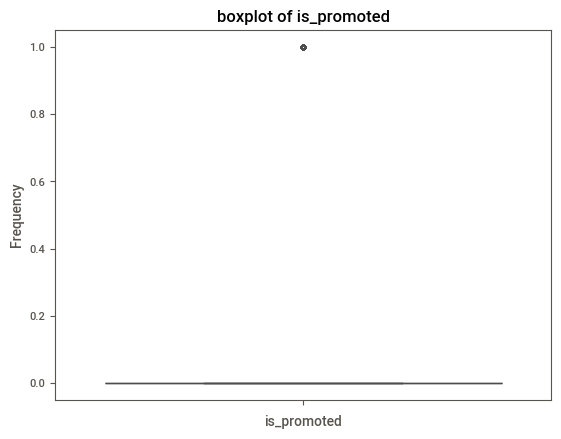

In [35]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for column in Employee_promotion.columns:
    
     if columns =='department':
         continue
     elif  columns =='region':
         continue
     elif columns =='education':
         continue
     elif columns =='gender':
         continue
     elif columns =='recruitment_channel':
         continue
     else :
      plt.figure()
      sns.boxplot(Employee_promotion[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'boxplot of {column}')  # Set plot titl
      plt.show()  
     if columns =='is_promoted':
         continue

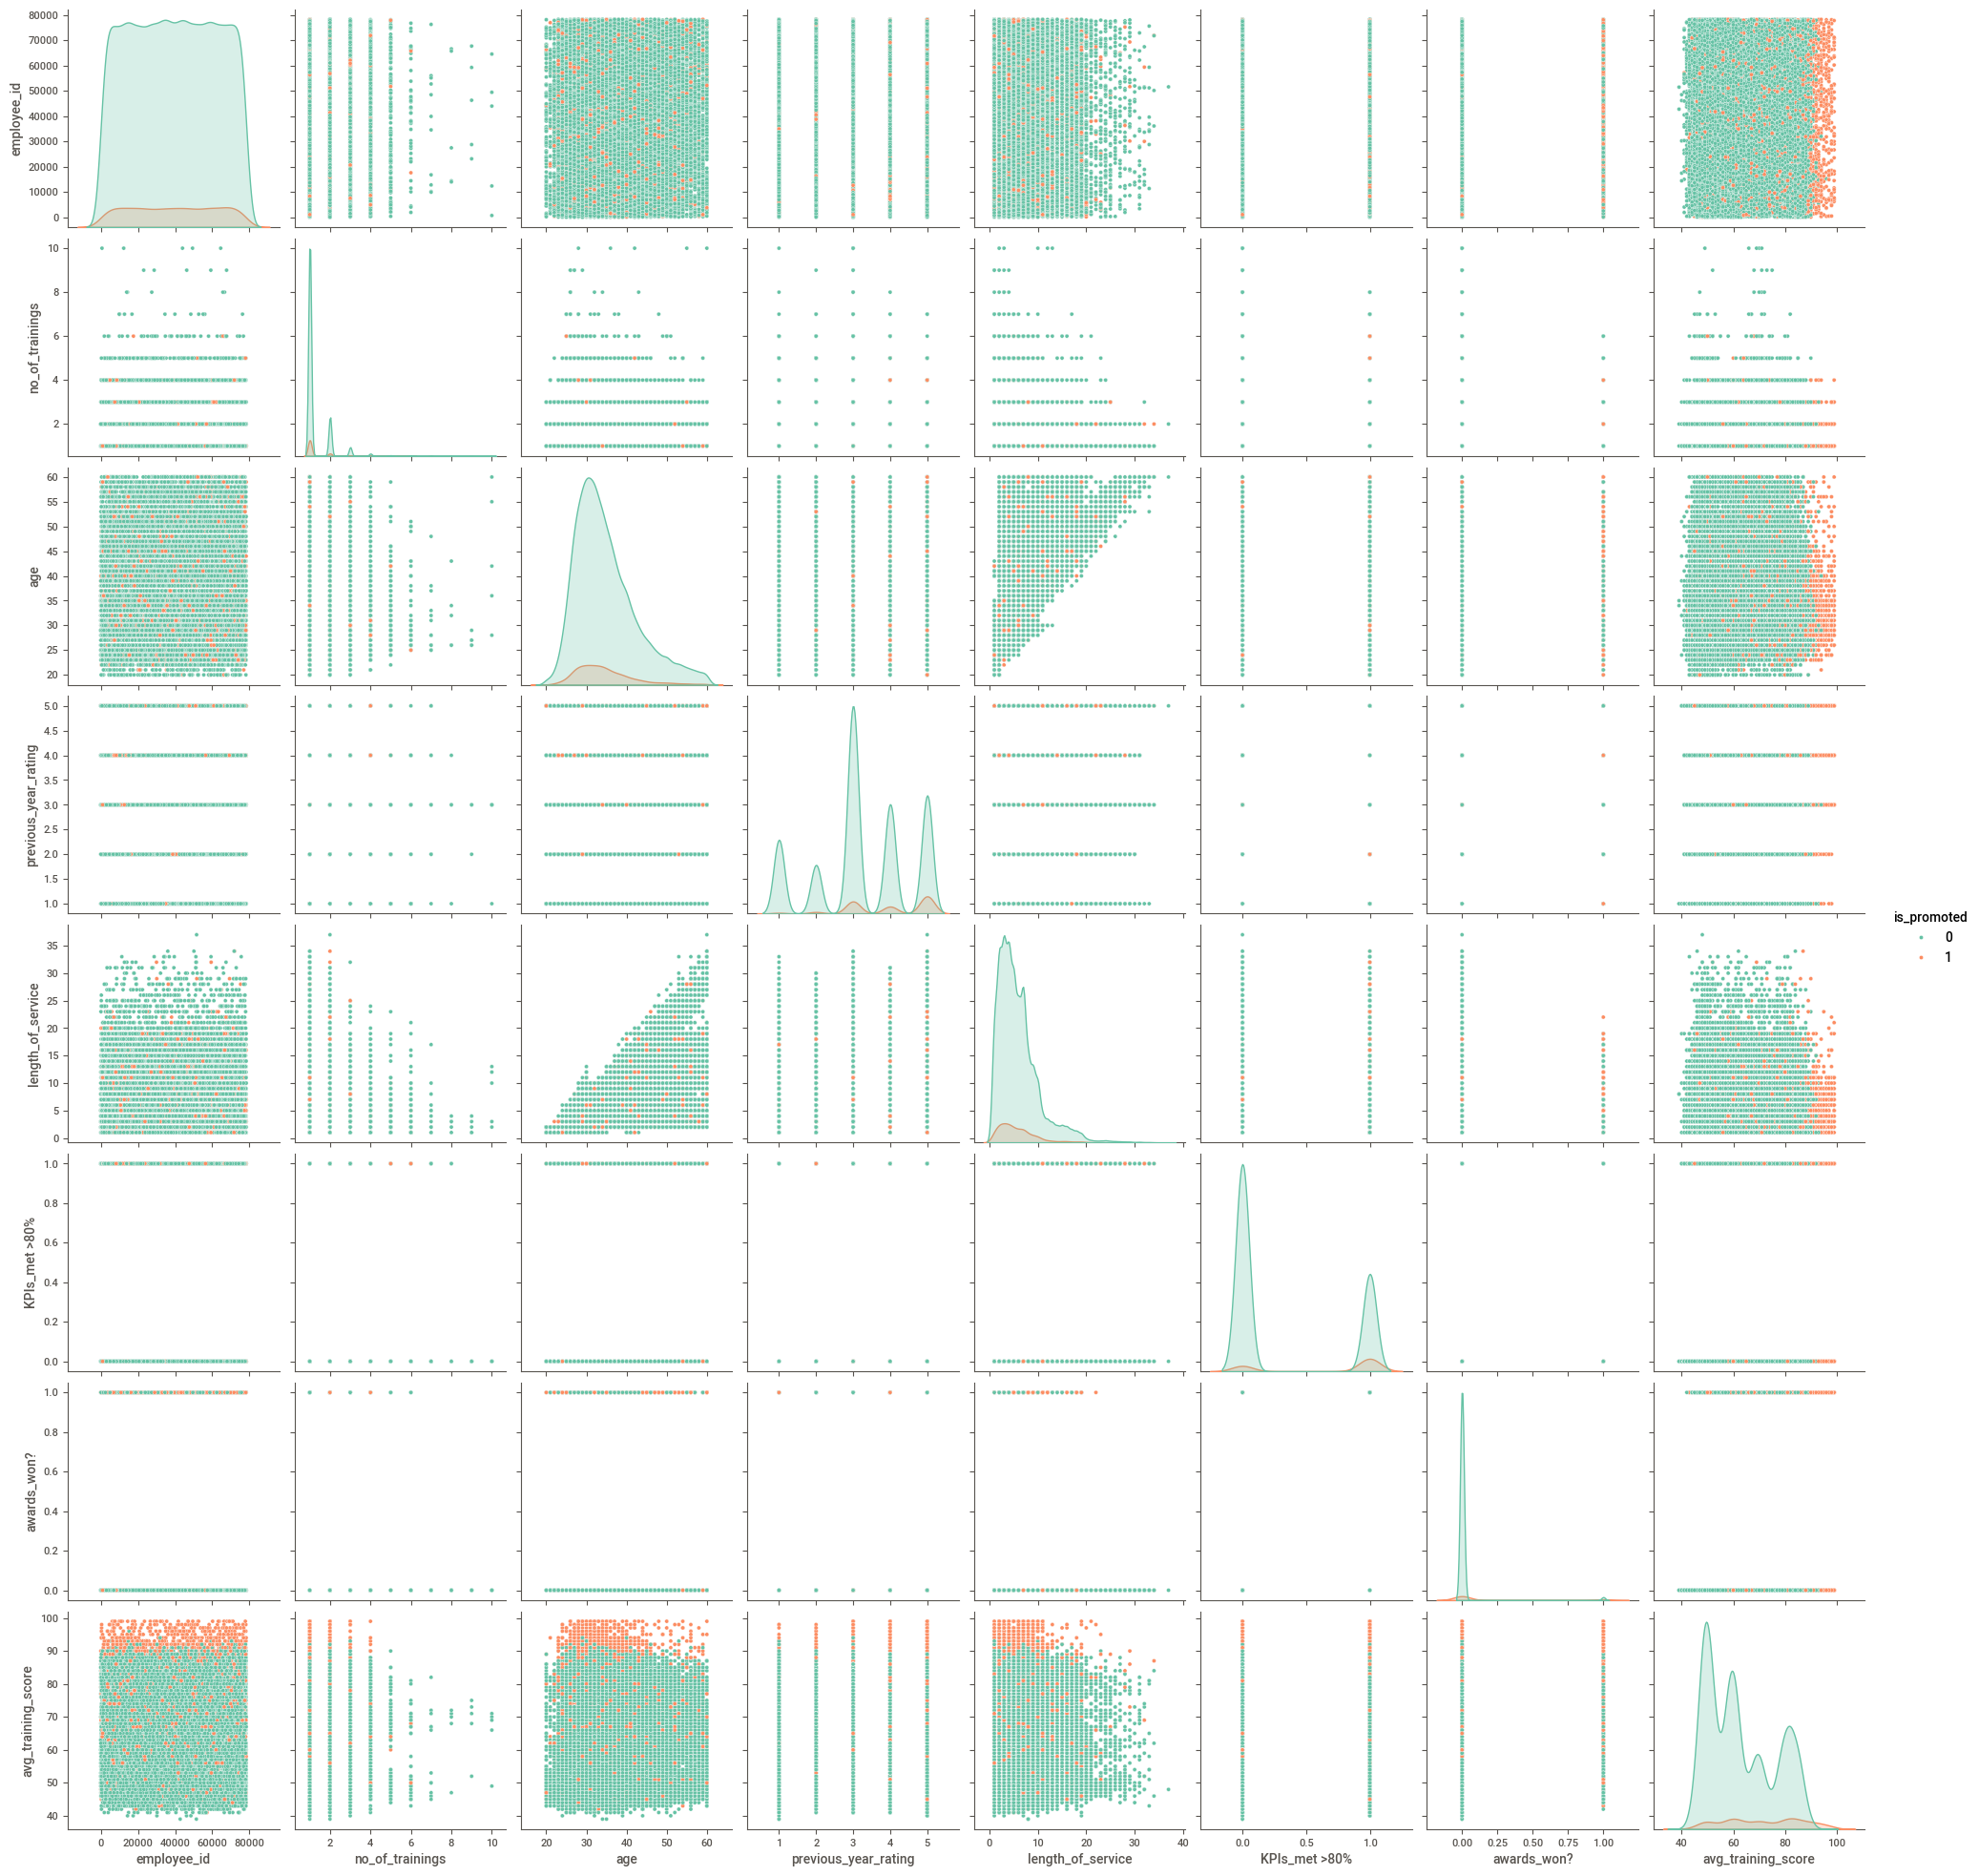

In [37]:
# fist we applying the pair polt
sns.pairplot(Employee_promotion,hue = 'is_promoted',palette='Set2')
plt.show()

In [39]:
correlation_matrix = Employee_promotion.describe().corr()
correlation_matrix

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,0.255369,0.255897,0.255322,0.25572,0.255274,0.255269,0.256313,0.255268
no_of_trainings,0.255369,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000
age,0.255897,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
previous_year_rating,0.255322,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000
length_of_service,0.255720,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
KPIs_met >80%,0.255274,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000
awards_won?,0.255269,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000
avg_training_score,0.256313,0.999999,1.000000,0.999999,1.00000,0.999999,0.999999,1.000000,0.999999
is_promoted,0.255268,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.999999,1.000000


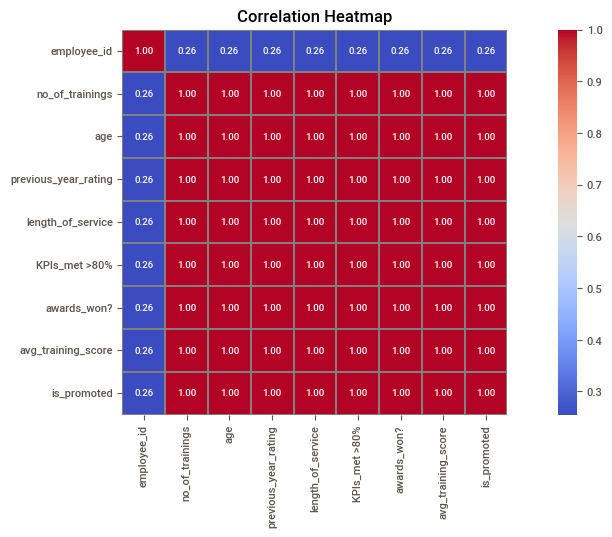

In [40]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

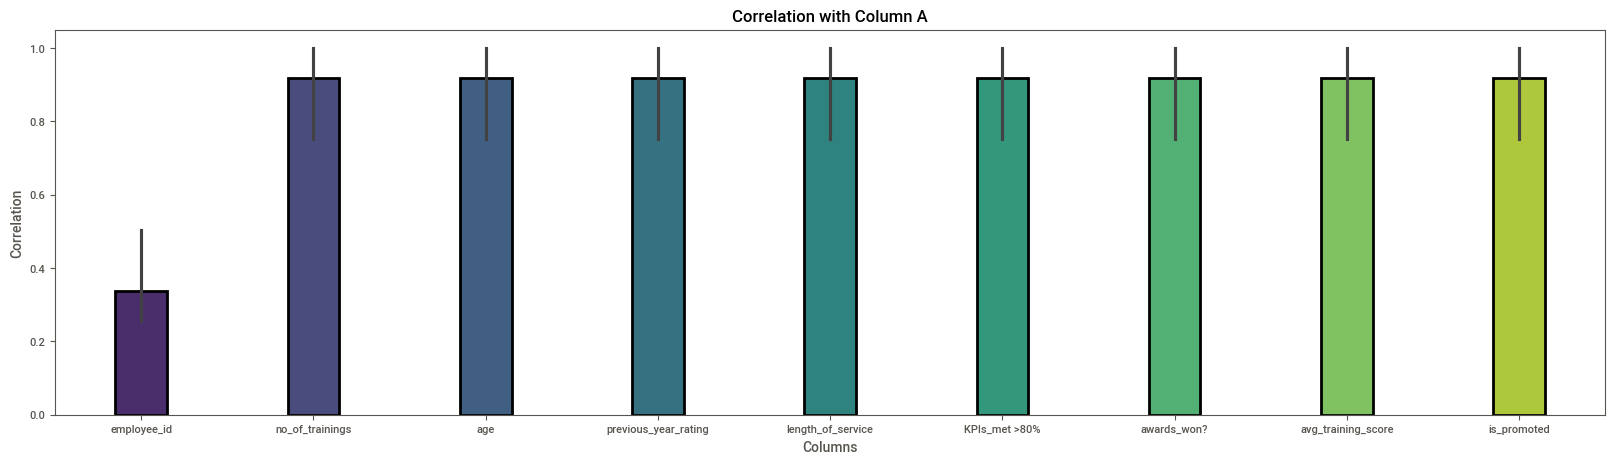

In [41]:
plt.figure(figsize=(20, 5))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=2,width=0.3)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

In [45]:
x = Employee_promotion.drop('is_promoted',axis = 1)
y = Employee_promotion['is_promoted']

In [46]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state = 42)

In [64]:
numerical_features_scalling = ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']
numerical_features_scalling = [x_train,x_test]
# ordinal_features_imputer = ['education']
ordinal_features_encoding = ['education']
categorical_features = ['department', 'gender', 'recruitment_channel']

In [65]:

numerical_scaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])


# ordinal_imputer_transformer = Pipeline(steps=[          # here we imputed before the above the code 
#     ('imputer', SimpleImputer(strategy='most_frequent'))
    
# ])


ordinal_encoding_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())

])



categorical_encoding_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

In [66]:
preprocessor = ColumnTransformer(
    transformers=[
        # ('num_imputer', numerical_imputer_transformer, numerical_features_imputer),
        ('num_scaler', numerical_scaler_transformer, numerical_features_scalling),
        # ('ordinal_imputer',ordinal_imputer_transformer,ordinal_features_imputer),
        ('ordinal_encoding',ordinal_encoding_transformer,ordinal_features_encoding),
        ('cat', categorical_encoding_transformer, categorical_features)
    ])

In [67]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
])

In [68]:
from sklearn import set_config
# Plot the pipeline
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [       employee_id         department     region         education gender  \
3872         43253  Sales & Marketing  region_19        Bachelor's      m   
11619        67983         Technology  region_13  Master's & above      m   
36178        17959         Technology  region_22        Bachelor's      m   
29884        50522  Sales & Marketing   region_2  Master's & above      m   
22968        6...
6978                  11              0            0                  64  
12814                  8              0            0                  56  
22921                  4              0            0                  80  
...                  ...            ...          ...                 ...  
3458                   2              0            0                  83  
26056                  3              1            0                  45  
29981                  4              1            0                  50  
44352                  5              0            0                  49  
18295                  2              0            0                  54  

[10962 rows x 13 columns]]),
                                                 ('ordinal_encoding',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['education']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['department', 'gender',
                                                   'recruitment_channel'])]))])